In [26]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(23)

In [27]:
houses_df = pd.read_csv("HousePriceIndia.csv")

In [28]:
prices = houses_df["Price"]

q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)

iqr = q3 - q1
print(f"iqr: {iqr}")


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

iqr: 325000.0
lower bound: -167500.0
upper bound: 1132500.0


In [29]:
lower_bound = max(0, lower_bound)
threshold1 = lower_bound + (upper_bound - lower_bound) / 3
threshold2 = lower_bound + (upper_bound - lower_bound) / 3 * 2

print(f"threshold 1: {threshold1}")
print(f"threshold 2: {threshold2}")

threshold 1: 377500.0
threshold 2: 755000.0


In [30]:
labels = [1, 2, 3]
bins = [-float("inf"), threshold1, threshold2, float("inf")]
houses_df["price_category"] = pd.cut(houses_df["Price"], bins=bins, labels=labels, include_lowest=True)

houses_df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,price_category
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,3
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,3
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,3
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,3
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,3
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,3
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,0,122008,52.7637,-114.050,3320,11241,3,72,785000,3
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,0,122006,52.9254,-114.482,1570,10578,3,71,750000,2
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,0,122009,52.8014,-114.598,2010,6550,1,73,750000,2
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,0,122010,52.9145,-114.391,2320,10814,2,53,698000,2


In [31]:
category_counts = houses_df['price_category'].value_counts()
print(category_counts)
print()
houses_df.info()


price_category
2    6912
1    5307
3    2401
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     14620 non-null  int64   
 1   Date                                   14620 non-null  int64   
 2   number of bedrooms                     14620 non-null  int64   
 3   number of bathrooms                    14620 non-null  float64 
 4   living area                            14620 non-null  int64   
 5   lot area                               14620 non-null  int64   
 6   number of floors                       14620 non-null  float64 
 7   waterfront present                     14620 non-null  int64   
 8   number of views                        14620 non-null  int64   
 9   condition of the house                 14620 non-null  

<h1>Creation of the training set, validation set and testing set</h1>

In [32]:
from sklearn.model_selection import train_test_split

houses_df['Renovated'] = [1 if e > 0 else 0 for e in houses_df['Renovation Year']]

y = np.array(houses_df['price_category'])
X = houses_df.drop(['Price','price_category'],axis=1)

X_used, X_test, y_used, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_used, y_used, stratify=y_used, test_size=1/8, random_state=42
)

print(f"all data: {X.shape}\nused in the training process: {X_used.shape}\nused for training: {X_train.shape}\nused for validation: {X_val.shape}\nused for final testing: {X_test.shape}")



X_train_nobe = pd.DataFrame(X_train, columns=['number of bedrooms'])
X_train_noba = pd.DataFrame(X_train, columns=["number of bathrooms"])
X_train_la = pd.DataFrame(X_train, columns=["living area"])
X_train_nof = pd.DataFrame(X_train, columns=['number of floors'])
X_train_wf = pd.DataFrame(X_train, columns=['waterfront present'])
X_train_nov = pd.DataFrame(X_train, columns=['number of views'])
X_train_lar = pd.DataFrame(X_train, columns=['living_area_renov'])
X_train_r = pd.DataFrame(X_train, columns=['Renovated'])
X_test_r = pd.DataFrame(X_test, columns=['Renovated'])
X_test_la = pd.DataFrame(X_test, columns=["living area"])
print(y_test)

all data: (14620, 23)
used in the training process: (11696, 23)
used for training: (10234, 23)
used for validation: (1462, 23)
used for final testing: (2924, 23)
[3 2 1 ... 3 2 2]


<Axes: >

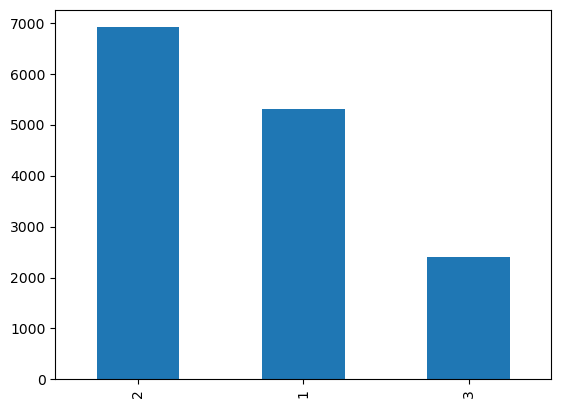

In [33]:

pd.Series(y).value_counts().plot(kind='bar')


<Axes: >

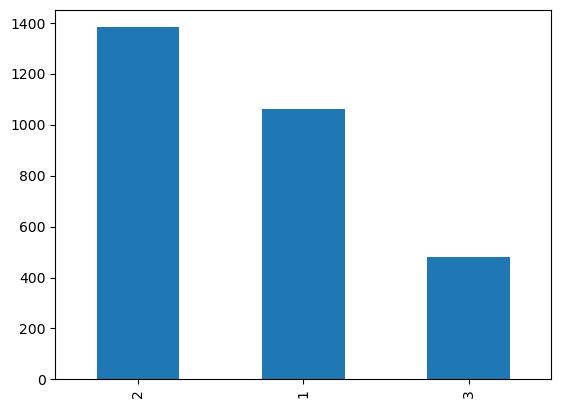

In [34]:
pd.Series(y_test).value_counts().plot(kind='bar')

<Axes: >

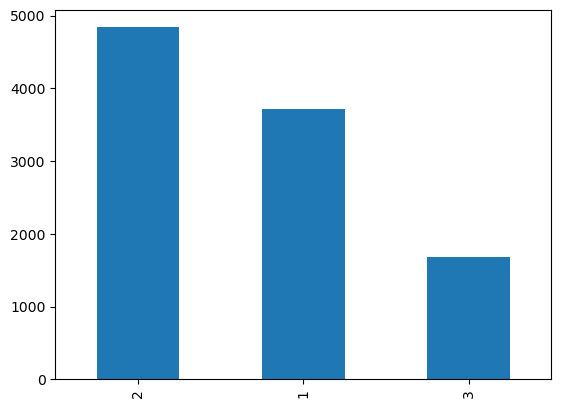

In [35]:

pd.Series(y_train).value_counts().plot(kind='bar')

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [37]:
dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train_la,y_train)
y_proba = dc.predict_proba(X_test_la)
y_hat = dc.predict(X_test)
print("proba: " + str(y_proba[0:30,0]) + '\ny:     ' + str(y_hat[0:30]) + '\ny_hat: ' + str(y_test[0:30]))

print(accuracy_score(y_test, y_hat))

proba: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
y:     [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_hat: [3 2 1 1 2 2 2 2 2 1 1 1 2 2 2 3 2 1 3 1 2 1 2 1 3 1 2 1 1 1]
0.472640218878249


In [38]:
lr = LogisticRegression(max_iter=1000, penalty= 'l1', solver='liblinear')

lr.fit(X_train_la,y_train)
y_hat_lr = lr.predict(X_test_la)
print('y:     ' + str(y_test[0:30]) + '\ny_hat: ' + str(y_hat_lr[0:30]))

print(accuracy_score(y_test, y_hat_lr))

y:     [3 2 1 1 2 2 2 2 2 1 1 1 2 2 2 3 2 1 3 1 2 1 2 1 3 1 2 1 1 1]
y_hat: [2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 1 2 1 1 2]
0.6032831737346102


In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

tree1 = DecisionTreeClassifier()
tree1.fit(X_train_la,y_train)

y_hat = tree1.predict(X_test_la)
print('y:     ' + str(y_hat[0:30]) + '\ny_hat: ' + str(y_test[0:30]))

y:     [2 2 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 2]
y_hat: [3 2 1 1 2 2 2 2 2 1 1 1 2 2 2 3 2 1 3 1 2 1 2 1 3 1 2 1 1 1]


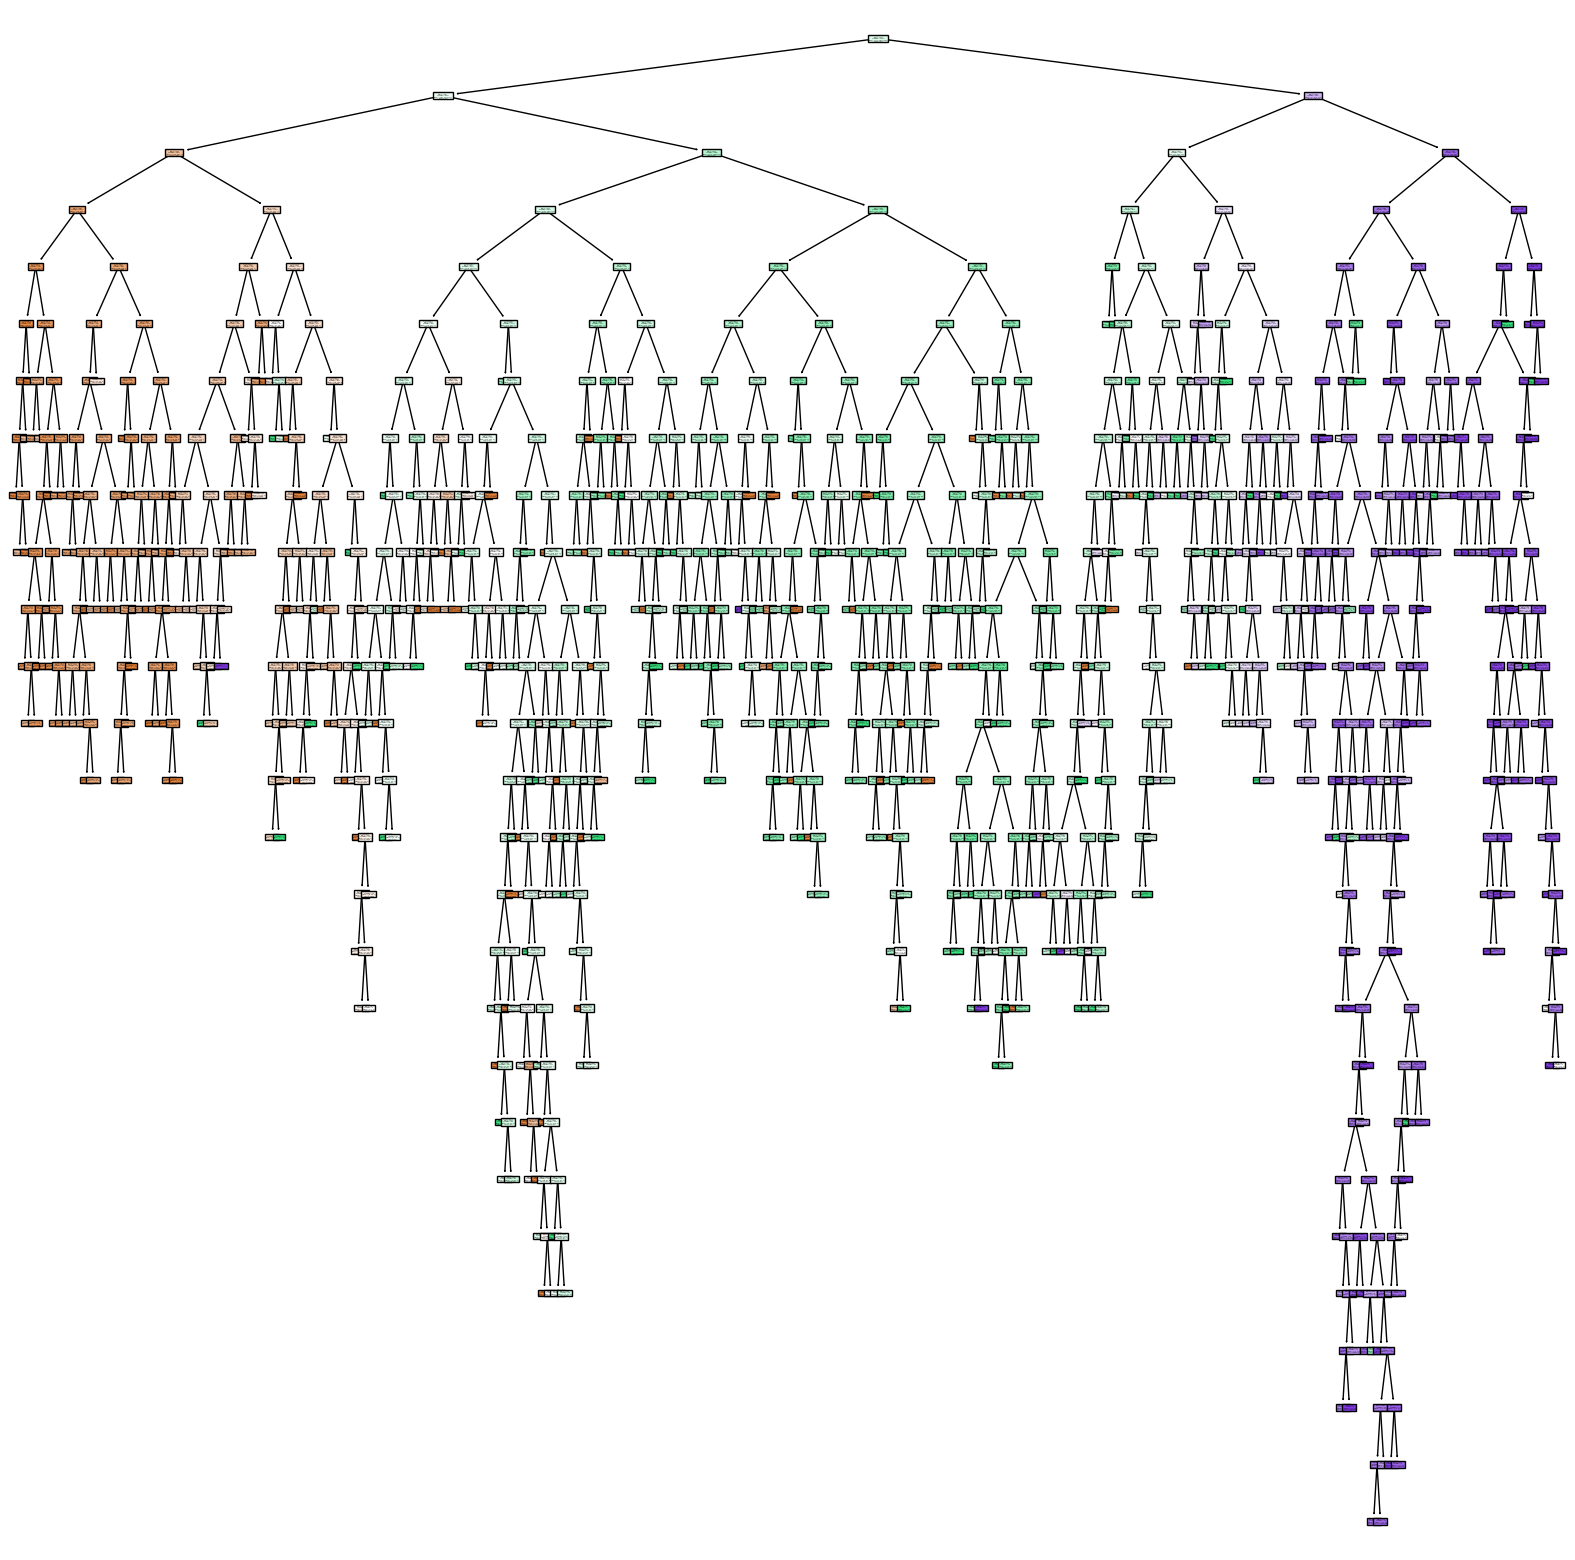

In [40]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, feature_names=list(X.columns), class_names=['cheap', 'mid', 'expensive'])
plt.show()